## 1. Research Question

Can we predict whether it will rain on a given day in San Diego using varaibles such as humidity, wind speed, sea-level pressure, and minimum temperature?

## 2. Data cleaning

Here we will clean the san diego weather dataset, creating a new column called "Rain" which be set to 1 if there was rain, 0 otherwise. Then using that we fill randomly sample an equal number of no-rain days vs rain days in order to combine the two subsets and shuffle them. This should greatly help with the imbalance, as prior EDA found it only rained about ~10% of the time. 

1. Start with full cleaned dataframe
2. create rain col
3. Sum up rainy days
4. Randomly sample equal number of non rainy days
5. Combine into final set

### Step 1: Full cleaned dataframe

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
path = "data/full_set.csv"

In [ ]:
full_set = pd.read_csv(path)

# Keeping only needed cols
cols_to_keep = [
    "DATE",
    "DailyPrecipitation",
    "DailyAverageRelativeHumidity",
    "DailyAverageWindSpeed",
    "DailyAverageSeaLevelPressure",
    "DailyMinimumDryBulbTemperature"
]

full_set = full_set[cols_to_keep].copy()

C:\Users\Beandip\AppData\Local\Temp\ipykernel_20632\3487967754.py:1: DtypeWarning: Columns (3,21,27,28,29,30,31,32,33,34,38,43,44,45,49,50,52,53,54,70,72,73,89,96,97,98,99,100,101,102,103,104,105,106,107,108) have mixed types. Specify dtype option on import or set low_memory=False.
  full_set = pd.read_csv(path)


In [ ]:
# cleaning up precipitation col
full_set["DailyPrecipitation"] = (
    full_set["DailyPrecipitation"]
        .replace("T", 0.005)   # trace amounts = tiny rainfall
        .replace("M", np.nan)  # missing data
)

In [ ]:
# cleaning up tempature (converting to int)
full_set["DailyMinimumDryBulbTemperature"] = pd.to_numeric(full_set["DailyMinimumDryBulbTemperature"], errors="coerce")

In [52]:
full_set = full_set.dropna()

In [ ]:
# Renaming for easier access
full_set = full_set.rename(columns={
    "DailyPrecipitation": "precip",
    "DailyAverageRelativeHumidity": "humidity",
    "DailyAverageWindSpeed": "wind_speed",
    "DailyAverageSeaLevelPressure": "sea_pressure",
    "DailyMinimumDryBulbTemperature": "min_temp"
})

In [54]:
print(full_set)

                       DATE precip  humidity  wind_speed  sea_pressure  \
28      2016-01-01T23:59:00   0.00      39.0         1.2         30.10   
57      2016-01-02T23:59:00   0.00      48.0         1.9         30.08   
86      2016-01-03T23:59:00  0.005      62.0         4.3         29.95   
130     2016-01-04T23:59:00   0.14      77.0         4.6         29.81   
198     2016-01-05T23:59:00   1.65      80.0        10.8         29.90   
...                     ...    ...       ...         ...           ...   
111007  2024-09-26T23:59:00   0.00      77.0         6.8         29.89   
111049  2024-09-27T23:59:00   0.00      79.0         6.1         29.87   
111094  2024-09-28T23:59:00   0.00      79.0         6.2         29.88   
111140  2024-09-29T23:59:00   0.00      81.0         7.0         29.89   
111183  2024-09-30T23:59:00   0.00      79.0         4.6         29.89   

        min_temp  
28          44.0  
57          45.0  
86          48.0  
130         56.0  
198         58.0

### Step 2: Rain column

In [55]:
full_set["precip"] = pd.to_numeric(full_set["precip"], errors='coerce')

In [56]:
full_set["rain"] = (full_set["precip"] > 0).astype(int)

In [57]:
print(full_set)

                       DATE  precip  humidity  wind_speed  sea_pressure  \
28      2016-01-01T23:59:00   0.000      39.0         1.2         30.10   
57      2016-01-02T23:59:00   0.000      48.0         1.9         30.08   
86      2016-01-03T23:59:00   0.005      62.0         4.3         29.95   
130     2016-01-04T23:59:00   0.140      77.0         4.6         29.81   
198     2016-01-05T23:59:00   1.650      80.0        10.8         29.90   
...                     ...     ...       ...         ...           ...   
111007  2024-09-26T23:59:00   0.000      77.0         6.8         29.89   
111049  2024-09-27T23:59:00   0.000      79.0         6.1         29.87   
111094  2024-09-28T23:59:00   0.000      79.0         6.2         29.88   
111140  2024-09-29T23:59:00   0.000      81.0         7.0         29.89   
111183  2024-09-30T23:59:00   0.000      79.0         4.6         29.89   

        min_temp  rain  
28          44.0     0  
57          45.0     0  
86          48.0     1  

### Step 3 + 4: Sum of rainy days and creating subsets

In [58]:
full_set["rain"].value_counts()

rain
0    2549
1     611
Name: count, dtype: int64

In [59]:
rain_days = full_set[full_set["rain"] == 1]
no_rain_days = full_set[full_set["rain"] == 0]

In [60]:
n = len(rain_days)
no_rain_sample = no_rain_days.sample(n=n, random_state=42)


### Step 5: Combining and shuffling

In [61]:
final_data = pd.concat([rain_days, no_rain_sample])

In [ ]:
# Sanity check
print(final_data)

                      DATE  precip  humidity  wind_speed  sea_pressure  \
86     2016-01-03T23:59:00   0.005      62.0         4.3         29.95   
130    2016-01-04T23:59:00   0.140      77.0         4.6         29.81   
198    2016-01-05T23:59:00   1.650      80.0        10.8         29.90   
244    2016-01-06T23:59:00   0.610      73.0         8.1         30.01   
277    2016-01-07T23:59:00   0.560      67.0        11.7         29.94   
...                    ...     ...       ...         ...           ...   
41063  2019-04-13T23:59:00   0.000      56.0         4.8         29.98   
33052  2018-08-20T23:59:00   0.000      72.0         7.1         29.94   
82296  2022-08-02T23:59:00   0.000      75.0         7.4         30.00   
43899  2019-07-05T23:59:00   0.000      70.0         5.5         30.01   
26730  2018-02-11T23:59:00   0.000      71.0         4.6         29.91   

       min_temp  rain  
86         48.0     1  
130        56.0     1  
198        58.0     1  
244        54.0

In [63]:
balanced_set = final_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [64]:
balanced_set.head()

,DATE,precip,humidity,wind_speed,sea_pressure,min_temp,rain
0,2019-04-05T23:59:00,0.060,75.0,5.9,30.04,56.0,1
1,2022-01-15T23:59:00,0.030,62.0,3.0,30.13,52.0,1
2,2016-06-01T23:59:00,0.005,76.0,4.5,29.93,61.0,1
3,2023-03-26T23:59:00,0.000,60.0,5.1,30.12,48.0,0
4,2023-10-23T23:59:00,0.005,75.0,6.5,29.80,62.0,1


In [ ]:
# Saving the new CSV
balanced_set.to_csv('data/balanced_set.csv', index=False)

## 3 EDA 

With our balanced dataset we can now move on to exploring the predictors. We will use: Histograms (for distrubution shape), Boxplots (spread), Correlation matrix (overview of relationships), scatterplots between pairs of predictors (multcollinearity)

In [66]:
balanced_set = pd.read_csv("data/balanced_set.csv")

In [ ]:
balanced_set.describe()

,precip,humidity,wind_speed,sea_pressure,min_temp,rain
count,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000,1222.000000
mean,0.072480,69.789689,6.052455,29.995360,57.964812,0.500000
std,0.227891,10.971520,2.473229,0.102928,7.290817,0.500205
min,0.000000,23.000000,1.800000,29.570000,38.000000,0.000000
25%,0.000000,65.000000,4.500000,29.930000,53.000000,0.000000
50%,0.002500,72.000000,5.800000,29.990000,58.000000,0.500000
75%,0.017500,77.000000,7.000000,30.060000,63.000000,1.000000
max,2.730000,95.000000,21.600000,30.290000,78.000000,1.000000


Summary of variables falls in line with San Diego weather. We see humidity averages to around 70%, wind speed at 6% and temperatures around 57F

### Histograms

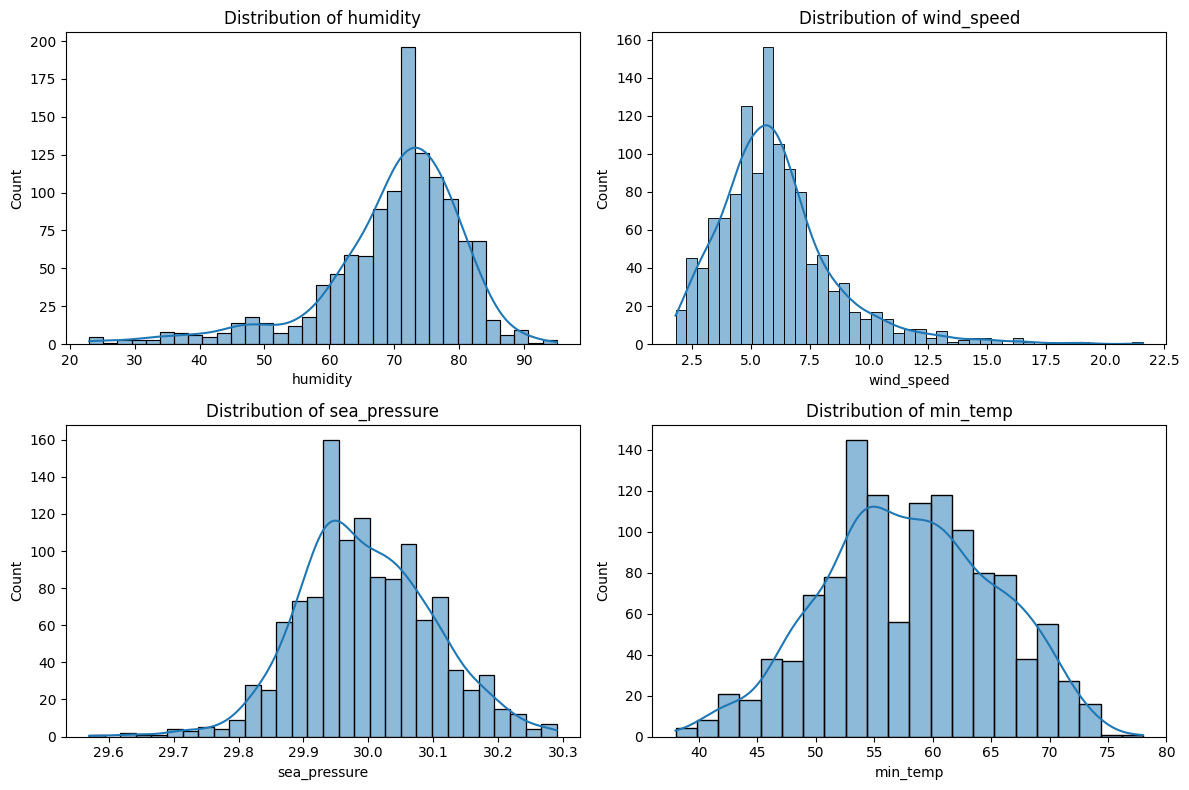

In [68]:
cols = ["humidity", "wind_speed", "sea_pressure", "min_temp"]

plt.figure(figsize=(12,8))
for i, col in enumerate(cols, 1):
    plt.subplot(2,2,i)
    sns.histplot(balanced_set[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Humidity: Roughly bell shape, centered around 70-75%
Wind_speed: Right skewed since most days arent too windy
sea_pressure: Clustered around 29.9-30 inches of mercury
min_temp: Distribution centered around 55-60F

### Boxplots
Grouped by rain vs no rain

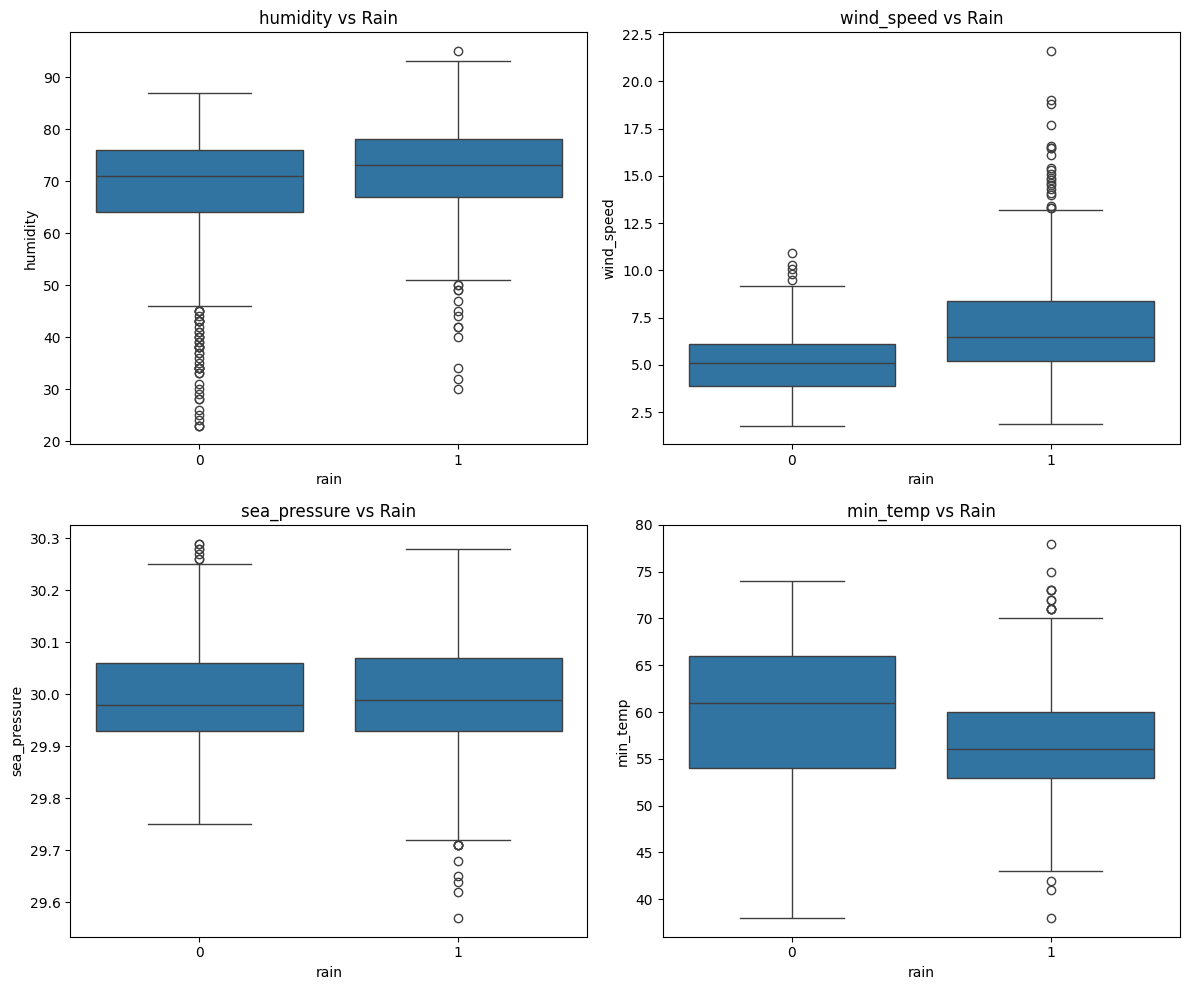

In [69]:
plt.figure(figsize=(12,10))
for i, col in enumerate(cols, 1):
    plt.subplot(2,2,i)
    sns.boxplot(data=balanced_set, x="rain", y=col)
    plt.title(f"{col} vs Rain")
plt.tight_layout()
plt.show()

Humidity: Higher median humidity on rainy days. The updwards shift indicates moist air is probably associated with rainfall

Wind_speed: Rainy days have higher median wind speeds compared to dry days. Should prove useful for separation between classes

sea_pressure: Very slight increase in median sea pressure but huge overlap indicates weak predictive power 

min_temp: Rainy days often are colder supported by the noticeable difference in median

### Correlation Matrix

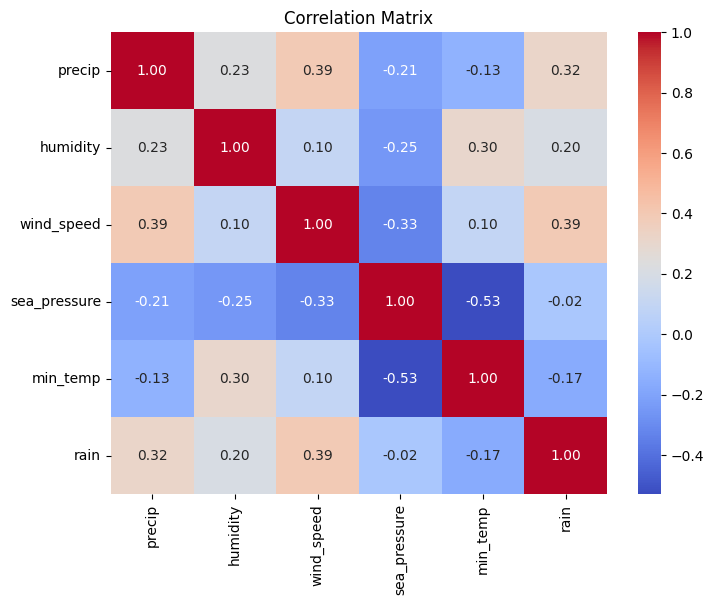

In [70]:
plt.figure(figsize=(8,6))
sns.heatmap(balanced_set.drop(columns=["DATE"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Predictors show low to moderate correlations, easing large concerns of multicollinearity. For the stronger correlations we see:

Sea pressure and min temp have the highest at -0.53. This makes sense as lower pressure coincides with cooler conditions

Wind speed and sea pressure also seem to have some correlation at -0.33, following storm pattern trends of high winds with low pressure

Humidity and min temp are slightly correated at 0.30, meaning humid nights are usually warmer

In relation to rain we see:

Humidity: some positive correlation at 0.20

Wind_speed: strongest positive correlation at 0.39

sea_pressure: almost no correlation at -0.02

min_temp: some negative correlation at -0.17


Overall rain shows the strongest associations with wind speed and precipitation, weaker relationships with humidity and temperature, and almost no relationship with sea-level pressure.

### Scatterplots

Humidity x Wind Speed

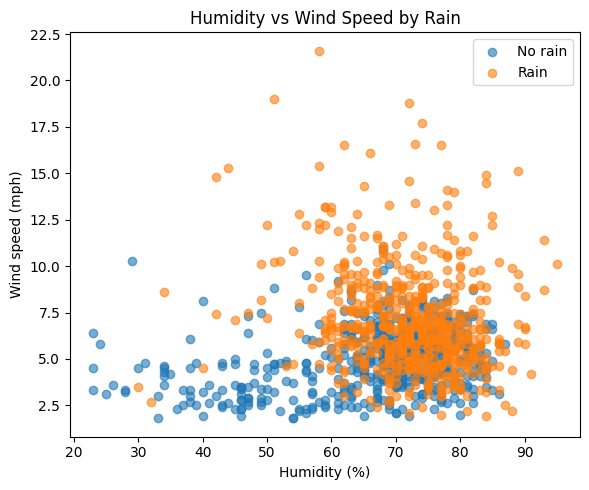

In [71]:
plt.figure(figsize=(6, 5))

for rain_value, group in balanced_set.groupby("rain"):
    label = "Rain" if rain_value == 1 else "No rain"
    plt.scatter(group["humidity"], group["wind_speed"], alpha=0.6, label=label)

plt.xlabel("Humidity (%)")
plt.ylabel("Wind speed (mph)")
plt.title("Humidity vs Wind Speed by Rain")
plt.legend()
plt.tight_layout()
plt.show()

suggests that moisture and wind often act together during storm conditions


Humidity x Min Temp

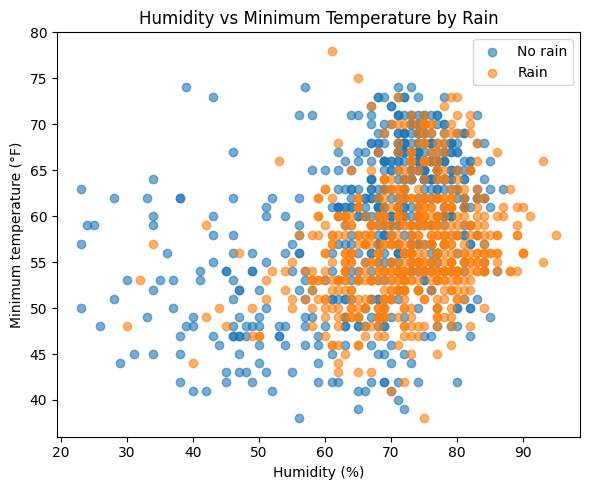

In [72]:
# 2. Humidity vs Minimum Temperature
plt.figure(figsize=(6, 5))

for rain_value, group in balanced_set.groupby("rain"):
    label = "Rain" if rain_value == 1 else "No rain"
    plt.scatter(group["humidity"], group["min_temp"], alpha=0.6, label=label)

plt.xlabel("Humidity (%)")
plt.ylabel("Minimum temperature (°F)")
plt.title("Humidity vs Minimum Temperature by Rain")
plt.legend()
plt.tight_layout()
plt.show()

indicates that cooler, humid nights are more likely to produce rain

Wind Speed vs Min Temp

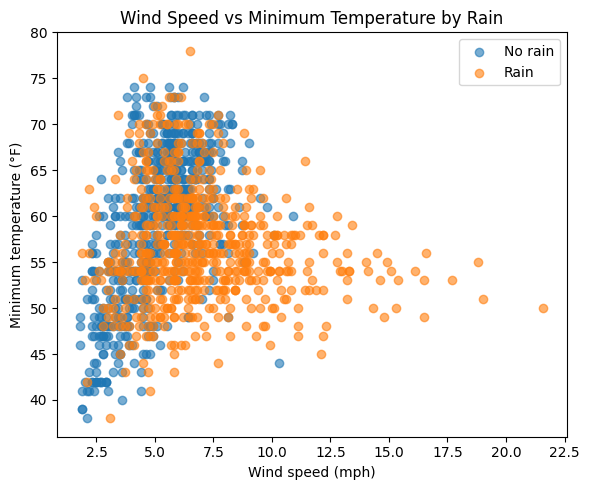

In [73]:
plt.figure(figsize=(6, 5))

for rain_value, group in balanced_set.groupby("rain"):
    label = "Rain" if rain_value == 1 else "No rain"
    plt.scatter(group["wind_speed"], group["min_temp"], alpha=0.6, label=label)

plt.xlabel("Wind speed (mph)")
plt.ylabel("Minimum temperature (°F)")
plt.title("Wind Speed vs Minimum Temperature by Rain")
plt.legend()
plt.tight_layout()
plt.show()

windier and cooler conditions accompany rainfall

## 4. Model implementations 

In [74]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve,
    classification_report
)

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing data set

data = pd.read_csv("data/balanced_set.csv")
data.head()

,DATE,precip,humidity,wind_speed,sea_pressure,min_temp,rain
0,2019-04-05T23:59:00,0.060,75.0,5.9,30.04,56.0,1
1,2022-01-15T23:59:00,0.030,62.0,3.0,30.13,52.0,1
2,2016-06-01T23:59:00,0.005,76.0,4.5,29.93,61.0,1
3,2023-03-26T23:59:00,0.000,60.0,5.1,30.12,48.0,0
4,2023-10-23T23:59:00,0.005,75.0,6.5,29.80,62.0,1


In [ ]:
# Setting up cols to use
predictors = ['humidity', 'wind_speed', 'sea_pressure', 'min_temp']
outcome = 'rain'

### 1. Simple Logistic Regression

Goal: Predict whether it will rain in San Diego using daily weather features.

Predictors:

Humidity,
Wind speed,
Sea-level pressure,
Minimum temperature

In [ ]:
# splitting data 70/30 and using stratified sampling to ensure similar proportion of rainy vs non-rainy days as full dataset
train_df, test_df = train_test_split(
    data,
    test_size=0.3,
    random_state=42,
    stratify=data[outcome]
)

In [125]:

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (855, 7)
Test shape: (367, 7)


In [126]:
y_train = train_df[outcome].astype(int)
y_test  = test_df[outcome].astype(int)

In [127]:
num_cols = predictors
scaler = StandardScaler().fit(train_df[num_cols])
X_train_num = pd.DataFrame(
    scaler.transform(train_df[num_cols]),
    columns=num_cols,
    index=train_df.index
)
X_test_num = pd.DataFrame(
    scaler.transform(test_df[num_cols]),
    columns=num_cols,
    index=test_df.index
)



In [128]:
X_train = X_train_num
X_test  = X_test_num

In [129]:
sk_log = LogisticRegression(max_iter=1000)
sk_log.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [130]:
yhat_tr = sk_log.predict(X_train)
yhat_te = sk_log.predict(X_test)
proba_te = sk_log.predict_proba(X_test)[:, 1]

In [131]:
baseline_rate = y_test.value_counts(normalize=True).max()

acc_tr = accuracy_score(y_train, yhat_tr)
acc_te = accuracy_score(y_test, yhat_te)
auc_te = roc_auc_score(y_test, proba_te)

In [132]:
print("Naive baseline (majority class accuracy):", round(baseline_rate, 3))
print(f"Accuracy (train): {acc_tr:.3f}")
print(f"Accuracy (test):  {acc_te:.3f}")
print(f"AUC (test):       {auc_te:.3f}")

Naive baseline (majority class accuracy): 0.501
Accuracy (train): 0.720
Accuracy (test):  0.752
AUC (test):       0.824


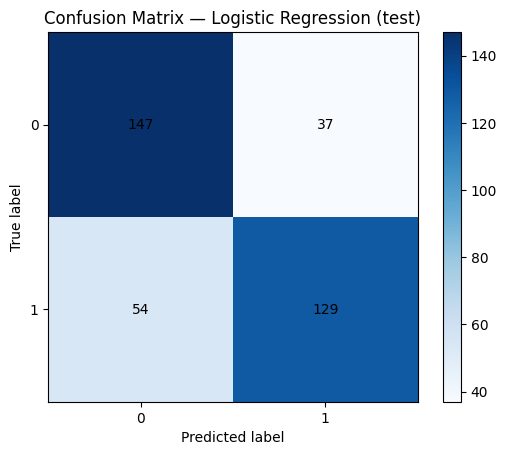

In [133]:
# Confusion matrix (test)
cm = confusion_matrix(y_test, yhat_te)
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center')

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['0', '1'])
ax.set_yticklabels(['0', '1'])

ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title("Confusion Matrix — Logistic Regression (test)")
plt.colorbar(im, ax=ax)
plt.show()

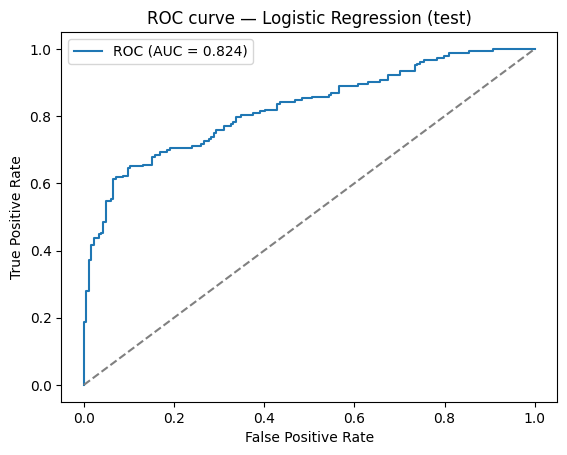

In [134]:
# ROC curve (test)

fpr, tpr, thr = roc_curve(y_test, proba_te)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_te:.3f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve — Logistic Regression (test)')
plt.legend()
plt.show()

In [135]:
scaler_all = StandardScaler().fit(data[num_cols])
X_all_scaled = scaler_all.transform(data[num_cols])
y_all = data[outcome].astype(int)

base_log = LogisticRegression(max_iter=1000)
cv_results = cross_validate(
    base_log,
    X_all_scaled,
    y_all,
    cv=10,
    scoring='accuracy',
    return_train_score=False
)
cv_scores = cv_results['test_score']
print("CV accuracy scores:", np.round(cv_scores, 3))
print("Mean CV accuracy:", cv_scores.mean().round(3))

CV accuracy scores: [0.683 0.756 0.697 0.754 0.689 0.697 0.689 0.697 0.803 0.779]
Mean CV accuracy: 0.724


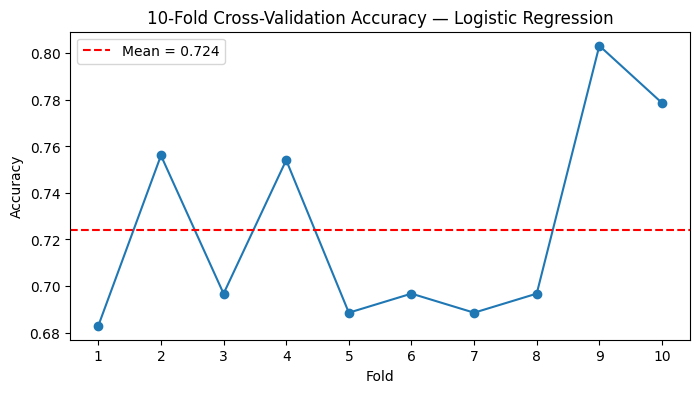

In [136]:
plt.figure(figsize=(8,4))
plt.plot(range(1, 11), cv_scores, marker='o')
plt.axhline(np.mean(cv_scores), color='red', linestyle='--', label=f'Mean = {np.mean(cv_scores):.3f}')
plt.title("10-Fold Cross-Validation Accuracy — Logistic Regression")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.xticks(range(1, 11))
plt.legend()
plt.show()

In [138]:
sk_log.intercept_

array([0.08881089])

In [137]:
coef_table = pd.DataFrame({
    "Predictor": predictors,
    "Coefficient": sk_log.coef_[0],
    "Odds Ratio": np.exp(sk_log.coef_[0])
})

coef_table

,Predictor,Coefficient,Odds Ratio
0,humidity,0.690656,1.995024
1,wind_speed,1.318108,3.736345
2,sea_pressure,-0.020471,0.979737
3,min_temp,-0.846865,0.428757


Model results:

Baseline (majority class): 0.501

Train accuracy: 0.720

Test accuracy: 0.752

AUC: 0.824

10-fold CV accuracy: 0.724

Interpretation: 

Performs well above baseline

Train and test accuracy are close, so no overfitting

AUC of 0.824 indicates good discriminative power

CV accuracy consistent with test performance 

### 2. Adding an interaction term

Humidity vs Min Temp because scatter plot shows highest overlap

In [91]:
# Copy to avoid modifying baseline data
data_inter = data.copy()

# Create interaction term
data_inter['humidity_minTemp'] = data_inter['humidity'] * data_inter['min_temp']

data_inter.head()

,DATE,precip,humidity,wind_speed,sea_pressure,min_temp,rain,humidity_minTemp
0,2019-04-05T23:59:00,0.060,75.0,5.9,30.04,56.0,1,4200.0
1,2022-01-15T23:59:00,0.030,62.0,3.0,30.13,52.0,1,3224.0
2,2016-06-01T23:59:00,0.005,76.0,4.5,29.93,61.0,1,4636.0
3,2023-03-26T23:59:00,0.000,60.0,5.1,30.12,48.0,0,2880.0
4,2023-10-23T23:59:00,0.005,75.0,6.5,29.80,62.0,1,4650.0


In [92]:
train_df2, test_df2 = train_test_split(
    data_inter,
    test_size=0.3,
    random_state=42,
    stratify=data_inter[outcome]
)

y_train2 = train_df2[outcome].astype(int)
y_test2  = test_df2[outcome].astype(int)

num_cols2 = ['humidity', 'wind_speed', 'sea_pressure', 'min_temp', 
             'humidity_minTemp']

In [93]:
scaler2 = StandardScaler().fit(train_df2[num_cols2])

X_train2 = pd.DataFrame(
    scaler2.transform(train_df2[num_cols2]),
    columns=num_cols2,
    index=train_df2.index
)

X_test2 = pd.DataFrame(
    scaler2.transform(test_df2[num_cols2]),
    columns=num_cols2,
    index=test_df2.index
)

In [161]:
log_inter = LogisticRegression(max_iter=1000)
log_inter.fit(X_train2, y_train2)

yhat_tr2 = log_inter.predict(X_train2)
yhat_te2 = log_inter.predict(X_test2)
proba_te2 = log_inter.predict_proba(X_test2)[:, 1]

acc_tr2 = accuracy_score(y_train2, yhat_tr2)
acc_te2 = accuracy_score(y_test2, yhat_te2)
auc2 = roc_auc_score(y_test2, proba_te2)

print("Train Accuracy:", acc_tr2)
print("Test Accuracy:", acc_te2)
print("AUC:", auc2)

Train Accuracy: 0.7239766081871345
Test Accuracy: 0.7493188010899182
AUC: 0.8238892848657638


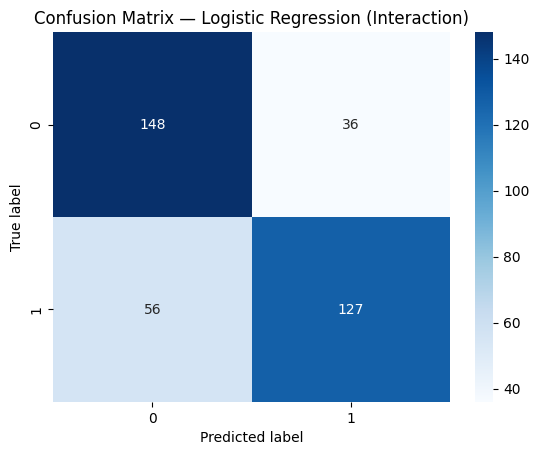

In [159]:
cm2 = confusion_matrix(y_test2, yhat_te2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Logistic Regression (Interaction)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

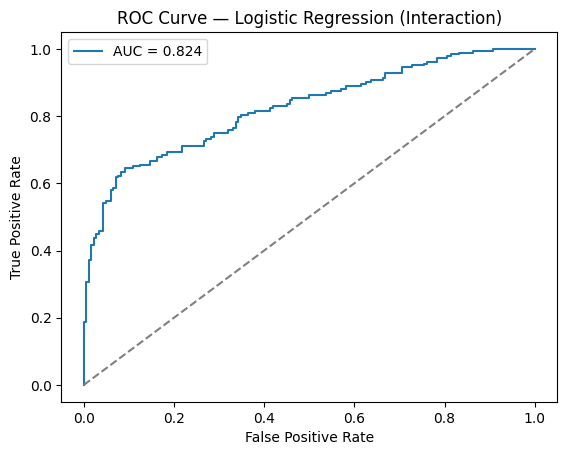

In [160]:
fpr2, tpr2, _ = roc_curve(y_test2, proba_te2)
plt.plot(fpr2, tpr2, label=f"AUC = {auc2:.3f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("ROC Curve — Logistic Regression (Interaction)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [162]:
scaler_all2 = StandardScaler().fit(data_inter[num_cols2])
X_all2 = scaler_all2.transform(data_inter[num_cols2])
y_all2 = data_inter[outcome].astype(int)

log_inter2 = LogisticRegression(max_iter=1000)
cv_results2 = cross_validate(
    log_inter2,
    X_all2,
    y_all2,
    cv=10,
    scoring='accuracy',
    return_train_score=False
)


cv_scores2 = cv_results2['test_score']
cv_inter_mean = np.mean(cv_scores2).round(3)

print("CV accuracy scores:", np.round(cv_scores2, 3))
print("Mean CV accuracy:", np.mean(cv_scores2).round(3))

CV accuracy scores: [0.691 0.756 0.697 0.746 0.697 0.689 0.689 0.697 0.803 0.795]
Mean CV accuracy: 0.726


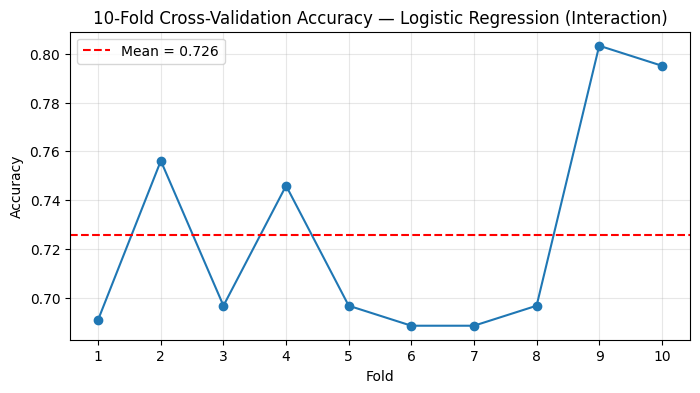

In [157]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11), cv_scores2, marker='o')
plt.axhline(np.mean(cv_scores2), color='red', linestyle='--', 
            label=f"Mean = {np.mean(cv_scores2):.3f}")
plt.title("10-Fold Cross-Validation Accuracy — Logistic Regression (Interaction)")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.xticks(range(1,11))
plt.legend()
plt.grid(alpha=0.3)
plt.show()

We added an interaction term between humidity and minimum temperature to account for the idea that warm, humid nights may increase the likelihood of rainfall.

While the interaction term produced a small increase in test accuracy (0.828 → 0.834), the ROC-AUC remained unchanged at 0.897.

Most importantly, 10-fold cross-validation accuracy did not improve (mean CV = 0.814 for both models), indicating that the interaction does not generalize better than the baseline model.

Therefore, although the interaction term is meteorologically reasonable, it does not meaningfully improve model performance in a statistically significant way.

In [99]:
coef = log_inter.coef_[0]
intercept = log_inter.intercept_[0]

print("Intercept:", intercept)
print("Coefficients:")
for name, value in zip(X_train2.columns, coef):
    print(f"{name}: {value:.4f}")

Intercept: 0.09043198152322196
Coefficients:
humidity: 1.1349
wind_speed: 1.3113
sea_pressure: -0.0202
min_temp: -0.4601
humidity_minTemp: -0.6744


### 3. Regularization
LASSO (Not too much multicollinearity and what to see which variables matter the most)

In [100]:
from sklearn.linear_model import LogisticRegressionCV

In [101]:
predictors = ['humidity', 'wind_speed', 'sea_pressure', 'min_temp']
outcome = 'rain'

In [102]:
X = data[predictors].copy()
y = data[outcome].astype(int).copy()

In [103]:

scaler_lasso = StandardScaler().fit(X)
X_scaled = scaler_lasso.transform(X)

In [150]:

lasso_cv = LogisticRegressionCV(
    Cs=50,
    cv=10,
    penalty='l1',
    solver='liblinear',
    scoring='accuracy',
    max_iter=1000,
    refit=True
)

lasso_cv.fit(X_scaled, y)

,Cs,50
,fit_intercept,True
,cv,10
,dual,False
,penalty,'l1'
,scoring,'accuracy'
,solver,'liblinear'
,tol,0.0001
,max_iter,1000
,class_weight,None
,n_jobs,None


In [151]:
best_C = lasso_cv.C_[0]
best_C

np.float64(0.040949150623804234)

In [155]:
lasso_cv.intercept_

array([0.])

In [153]:
lasso_coef = pd.Series(
    lasso_cv.coef_[0],
    index=predictors
)

lasso_coef

humidity        0.529401
wind_speed      1.065792
sea_pressure    0.000000
min_temp       -0.605242
dtype: float64

In [107]:
lasso_coef_values = lasso_cv.coef_[0]

lasso_or = np.exp(lasso_coef_values)

lasso_or_table = pd.DataFrame({
    "Predictor": predictors,
    "Coefficient": lasso_coef_values,
    "Odds Ratio": lasso_or
})

lasso_or_table

,Predictor,Coefficient,Odds Ratio
0,humidity,0.529411,1.697931
1,wind_speed,1.065786,2.903120
2,sea_pressure,0.000000,1.000000
3,min_temp,-0.605228,0.545950


In [108]:
# Final LASSO model with chosen C
lasso_final = LogisticRegression(
    penalty='l1',
    C=best_C,
    solver='liblinear',
    max_iter=1000
)

# 10-fold CV using the same scaled features X_scaled, labels y
cv_results_lasso = cross_validate(
    lasso_final,
    X_scaled,
    y,
    cv=10,
    scoring='accuracy',
    return_train_score=False
)

cv_lasso_scores = cv_results_lasso['test_score']
cv_lasso_mean   = cv_lasso_scores.mean()

print("LASSO CV accuracies:", np.round(cv_lasso_scores, 3))
print("Mean LASSO CV accuracy:", round(cv_lasso_mean, 3))

LASSO CV accuracies: [0.699 0.78  0.697 0.754 0.73  0.689 0.721 0.721 0.779 0.795]
Mean LASSO CV accuracy: 0.736


In [145]:
lasso_final.fit(X_scaled, y)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,np.float64(0....9150623804234)
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


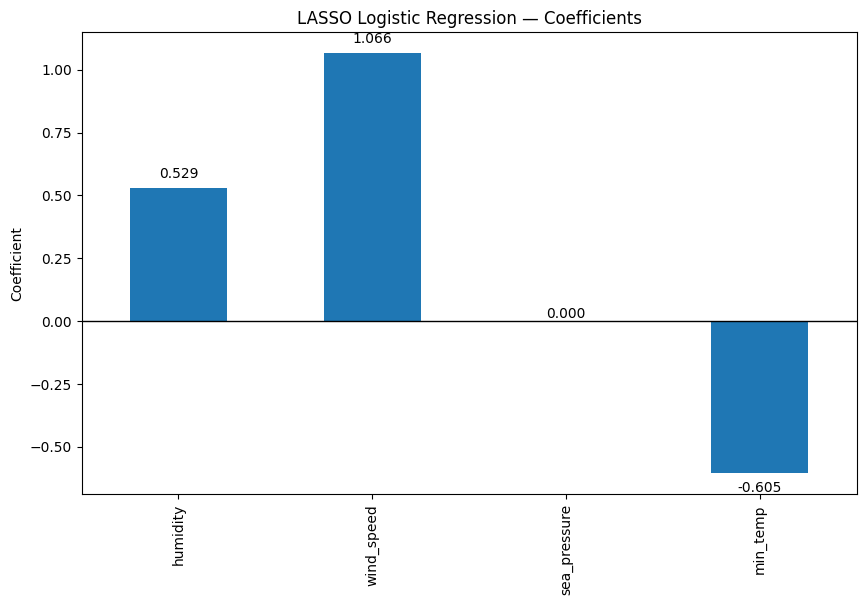

In [109]:
plt.figure(figsize=(10,6))
ax = lasso_coef.plot(kind='bar')

plt.title("LASSO Logistic Regression — Coefficients")
plt.axhline(0, color='black', linewidth=1)
plt.ylabel("Coefficient")

# Add labels above bars
for i, v in enumerate(lasso_coef):
    ax.text(i, v + 0.03 * np.sign(v), 
            f"{v:.3f}", 
            ha='center', va='bottom' if v >= 0 else 'top')

plt.show()

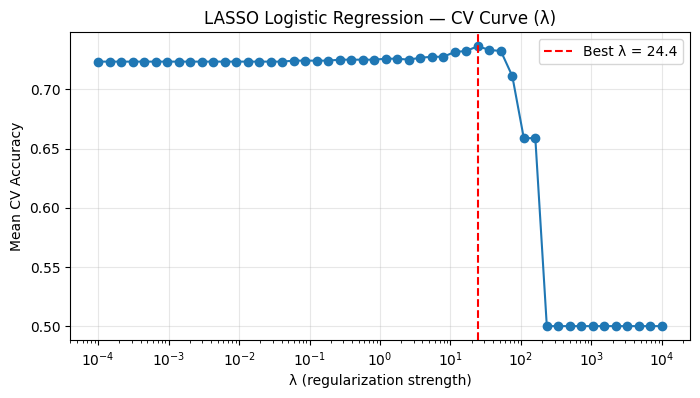

In [110]:
# Convert C to lambda
lambda_vals = 1 / lasso_cv.Cs_

# Compute mean CV accuracy
mean_scores = np.mean(lasso_cv.scores_[1], axis=0)

# Sort for correct plotting order
order = np.argsort(lambda_vals)
lambda_sorted = lambda_vals[order]
scores_sorted = mean_scores[order]

plt.figure(figsize=(8,4))
plt.plot(lambda_sorted, scores_sorted, marker='o')
plt.xscale('log')
plt.xlabel("λ (regularization strength)")
plt.ylabel("Mean CV Accuracy")
plt.title("LASSO Logistic Regression — CV Curve (λ)")

# vertical line
best_lambda = 1 / best_C
plt.axvline(best_lambda, color='red', linestyle='--', label=f"Best λ = {best_lambda:.1f}")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [112]:
X_train_lasso = scaler_lasso.transform(train_df[predictors])
X_test_lasso  = scaler_lasso.transform(test_df[predictors])

y_train_lasso = train_df[outcome].astype(int)
y_test_lasso  = test_df[outcome].astype(int)

yhat_lasso = lasso_cv.predict(X_test_lasso)
proba_lasso = lasso_cv.predict_proba(X_test_lasso)[:, 1]

lasso_acc = accuracy_score(y_test_lasso, yhat_lasso)
lasso_auc = roc_auc_score(y_test_lasso, proba_lasso)

print(f"lasso_acc: {lasso_acc}, lasso_auc: {lasso_auc}")

lasso_acc: 0.7683923705722071, lasso_auc: 0.824468401045379


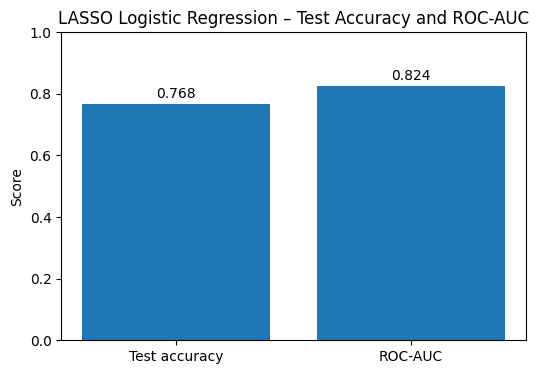

In [ ]:
metrics = ['Test accuracy', 'ROC-AUC']
values = [lasso_acc, lasso_auc]

plt.figure(figsize=(6,4))
bars = plt.bar(metrics, values)


plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('LASSO Logistic Regression – Test Accuracy and ROC-AUC')


for bar, v in zip(bars, values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        v + 0.01,
        f'{v:.3f}',
        ha='center',
        va='bottom'
    )

plt.show()

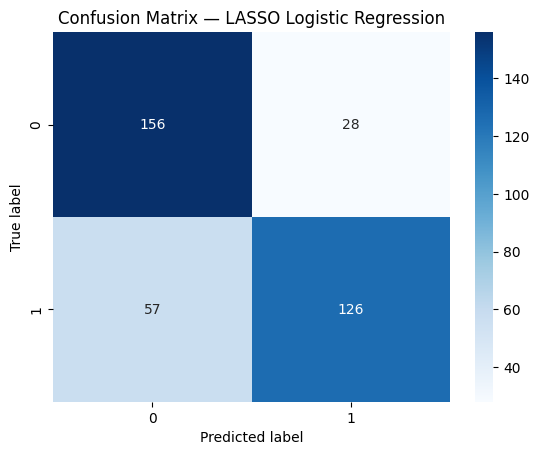

In [114]:
cm_lasso = confusion_matrix(y_test_lasso, yhat_lasso)
sns.heatmap(cm_lasso, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — LASSO Logistic Regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

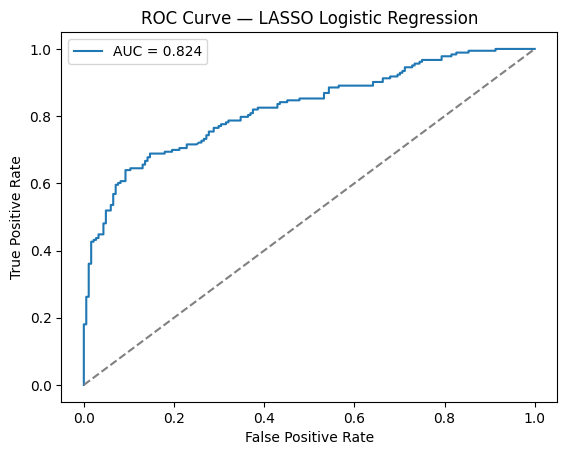

In [115]:
fpr_l, tpr_l, _ = roc_curve(y_test_lasso, proba_lasso)
plt.plot(fpr_l, tpr_l, label=f"AUC = {lasso_auc:.3f}")
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — LASSO Logistic Regression")
plt.legend()
plt.show()

### Comparisons

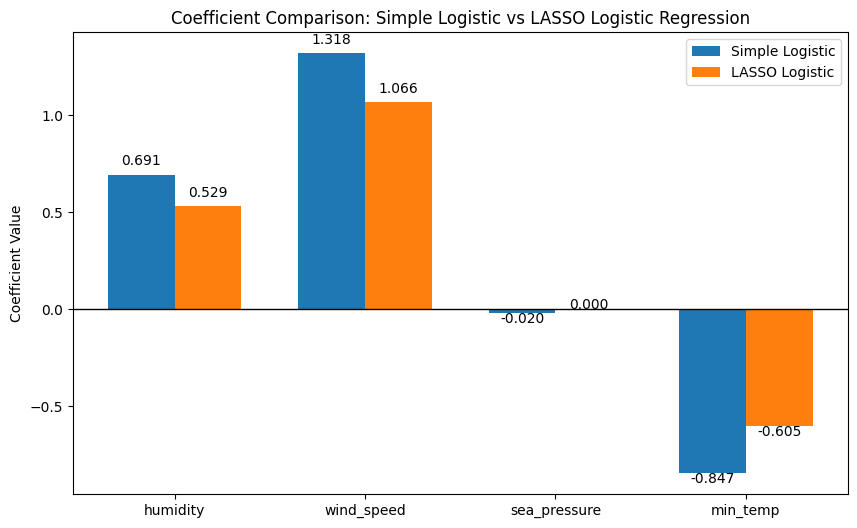

In [ ]:
# Simple logistic regression coefficients & predictors
simple_coef = np.array(sk_log.coef_[0])
predictors = predictors  # ['humidity', 'wind_speed', 'sea_pressure', 'min_temp']

# LASSO coefficients
lasso_coef = np.array(lasso_cv.coef_[0])

# build dataframe
coef_compare = pd.DataFrame({
    "Predictor": predictors,
    "Simple_Logistic": simple_coef,
    "LASSO_Logistic": lasso_coef
})


x = np.arange(len(predictors))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, coef_compare["Simple_Logistic"], width, label="Simple Logistic")
plt.bar(x + width/2, coef_compare["LASSO_Logistic"], width, label="LASSO Logistic")

# Add labels above bars
for i, v in enumerate(coef_compare["Simple_Logistic"]):
    plt.text(i - width/2, v + 0.05*np.sign(v), f"{v:.3f}", ha='center')

for i, v in enumerate(coef_compare["LASSO_Logistic"]):
    plt.text(i + width/2, v + 0.05*np.sign(v), f"{v:.3f}", ha='center')

plt.xticks(x, predictors)
plt.axhline(0, color='black', linewidth=1)
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison: Simple Logistic vs LASSO Logistic Regression")
plt.legend()
plt.show()

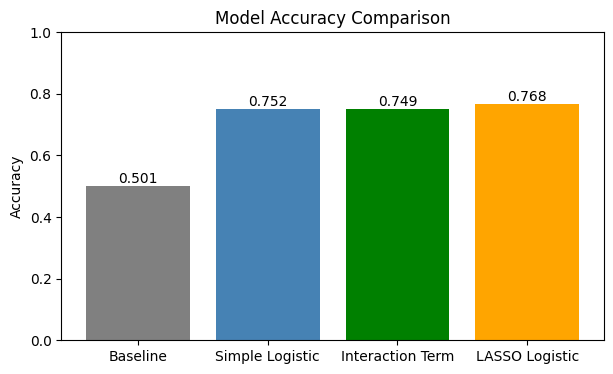

In [166]:
# Comparisons for model accuracy 
models = ["Baseline", "Simple Logistic", "Interaction Term", "LASSO Logistic"]
accuracies = [baseline_rate, acc_te, acc_te2, lasso_acc]

plt.figure(figsize=(7,4))
bars = plt.bar(models, accuracies, color=["gray", "steelblue", "green", "orange"])
plt.ylabel("Accuracy")
plt.ylim(0,1)

# annotate values
for bar, value in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.01,
             f"{value:.3f}", ha='center')

plt.title("Model Accuracy Comparison")
plt.show()

In [ ]:
# helper function to get AIC scores

def compute_aic(model, X, y):
    p = model.predict_proba(X)[:, 1]

    eps = 1e-9
    p = np.clip(p, eps, 1 - eps)

    ll = np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

    k = X.shape[1] + 1

    # AIC formula
    aic = 2*k - 2*ll
    return aic



In [119]:
# AIC for simple logistic regression
aic_simple = compute_aic(sk_log, X_test, y_test)
aic_simple

np.float64(380.9102363456442)

In [120]:
# AIC for LASSO logistic regression
aic_lasso = compute_aic(lasso_cv, X_test_lasso, y_test_lasso)
aic_lasso

np.float64(390.4118680995334)

In [121]:
print(f"AIC (Simple Logistic Regression): {aic_simple:.2f}")
print(f"AIC (LASSO Logistic Regression):  {aic_lasso:.2f}")

AIC (Simple Logistic Regression): 380.91
AIC (LASSO Logistic Regression):  390.41


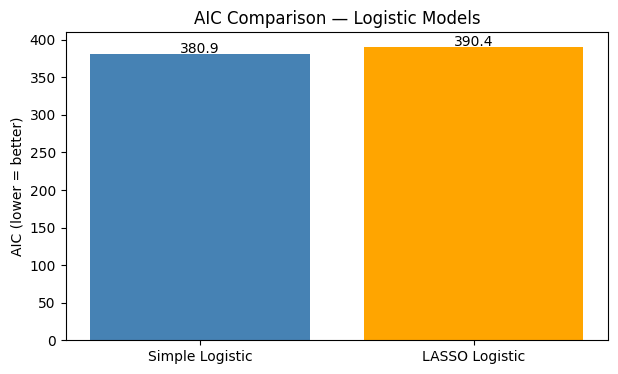

In [122]:
# Comparisons for AIC
aic_models = ["Simple Logistic", "LASSO Logistic"]
aic_values = [aic_simple, aic_lasso]

plt.figure(figsize=(7,4))
bars = plt.bar(aic_models, aic_values, color=["steelblue", "orange"])
plt.ylabel("AIC (lower = better)")

for bar, value in zip(bars, aic_values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 1,
             f"{value:.1f}", ha='center')

plt.title("AIC Comparison — Logistic Models")
plt.show()

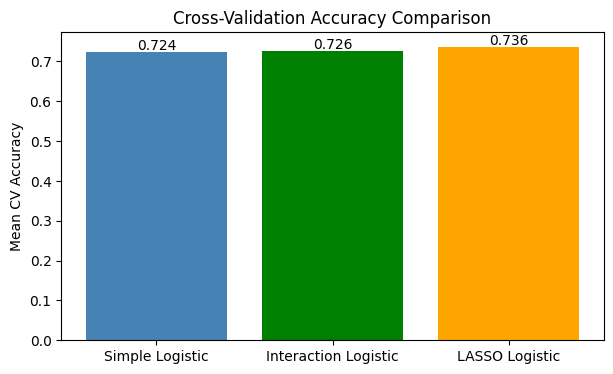

In [ ]:
# Comparing all models CV scores
cv_models = ["Simple Logistic", "Interaction Logistic", "LASSO Logistic"]
cv_values = [cv_scores.mean(),cv_inter_mean, cv_lasso_mean]

plt.figure(figsize=(7,4))
bars = plt.bar(cv_models, cv_values, color=["steelblue", "green", "orange"])
plt.ylabel("Mean CV Accuracy")

for bar, value in zip(bars, cv_values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.005,
             f"{value:.3f}", ha='center')

plt.title("Cross-Validation Accuracy Comparison")
plt.show()